In [1]:
import keras
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [2]:
train = pd.read_csv("Teleplay.csv", delimiter=",")
train.dropna(axis=0, how="any", inplace=True)

In [3]:
train.head()

,teleplay_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",long,1,9.37,200630
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",medium,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",medium,10,9.15,93351


In [4]:
train.info()
train = train.drop(["name"], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 10203
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teleplay_id  9972 non-null   int64  
 1   name         9972 non-null   object 
 2   genre        9972 non-null   object 
 3   type         9972 non-null   object 
 4   episodes     9972 non-null   object 
 5   rating       9972 non-null   float64
 6   members      9972 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 623.2+ KB


In [5]:


def tokenize(input_str: str = None) -> list:
    try:
        assert isinstance(input_str, str)
    except AssertionError as e:
        return list()

    return [word.strip() for word in input_str.split(",")]


def get_all_genre() -> list:
    genre = train["genre"]
    all_genre = set()
    for line in genre:
        for item in tokenize(line):
            all_genre.add(item)
    # Python set does not guarantee order, so convert to list
    return list(all_genre)


all_genre = get_all_genre()
all_type = np.unique(train["type"]).tolist()


In [6]:


def encode_genre(arr: list, all_genre: list) -> list:
    """
        encode genre to a vector, like "multi-hot encoder"
    """
    encoded = np.zeros_like(all_genre, dtype=np.int64)
    for genre in arr:
        encoded[all_genre.index(genre)] = 1
    return encoded


def encode_type(arr: list, all_type: list) -> list:
    encoded = [all_type.index(t) for t in arr]
    return encoded



In [7]:
encoded_genre = pd.DataFrame(
    np.array([encode_genre(tokenize(genre), all_genre) for genre in train["genre"]], dtype=np.int64), columns=all_genre, dtype=np.int64)
encoded_type = pd.DataFrame(
    np.array(encode_type(train["type"], all_type), dtype=np.int64), columns=["type"])

train = train.drop(["genre", "type"], axis=1)
train[train["episodes"] == "Unknown"] = 0.0
pd.to_numeric(train["episodes"])
train = train.astype("float")

train = pd.concat([train, encoded_type], axis=1)
train = pd.concat([train, encoded_genre], axis=1)
train.dropna(axis=0, how="any", inplace=True)

# capping
train.loc[train["episodes"] > 1000, "episodes"] = 1000
train.loc[train["members"] > 10000, "members"] = 10000


#!! baselines

In [8]:
model_result = []

train = train.astype("float")
train_Y = train["rating"]
train_X = train.drop(["rating", "teleplay_id"], axis=1)

In [9]:
reg = RandomForestRegressor()
train_X, val_X, train_Y, val_Y = train_test_split(
    train_X, train_Y, test_size=0.2)
reg.fit(train_X, train_Y)
mean_squared_error(val_Y, reg.predict(val_X))
model_result.append(cross_val_score(reg, train_X, train_Y,
                                    scoring=make_scorer(mean_squared_error)))

print("avg RMSE: %.4f" % result.mean())

NameError: name 'result' is not defined

In [10]:
import keras
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [11]:
train = pd.read_csv("Teleplay.csv", delimiter=",")
train.dropna(axis=0, how="any", inplace=True)

In [12]:
train.head()

,teleplay_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",long,1,9.37,200630
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",medium,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",medium,10,9.15,93351


In [13]:
train.info()
train = train.drop(["name"], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 10203
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teleplay_id  9972 non-null   int64  
 1   name         9972 non-null   object 
 2   genre        9972 non-null   object 
 3   type         9972 non-null   object 
 4   episodes     9972 non-null   object 
 5   rating       9972 non-null   float64
 6   members      9972 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 623.2+ KB


In [14]:


def tokenize(input_str: str = None) -> list:
    try:
        assert isinstance(input_str, str)
    except AssertionError as e:
        return list()

    return [word.strip() for word in input_str.split(",")]


def get_all_genre() -> list:
    genre = train["genre"]
    all_genre = set()
    for line in genre:
        for item in tokenize(line):
            all_genre.add(item)
    # Python set does not guarantee order, so convert to list
    return list(all_genre)


all_genre = get_all_genre()
all_type = np.unique(train["type"]).tolist()


In [15]:


def encode_genre(arr: list, all_genre: list) -> list:
    """
        encode genre to a vector, like "multi-hot encoder"
    """
    encoded = np.zeros_like(all_genre, dtype=np.int64)
    for genre in arr:
        encoded[all_genre.index(genre)] = 1
    return encoded


def encode_type(arr: list, all_type: list) -> list:
    encoded = [all_type.index(t) for t in arr]
    return encoded



In [16]:
encoded_genre = pd.DataFrame(
    np.array([encode_genre(tokenize(genre), all_genre) for genre in train["genre"]], dtype=np.int64), columns=all_genre, dtype=np.int64)
encoded_type = pd.DataFrame(
    np.array(encode_type(train["type"], all_type), dtype=np.int64), columns=["type"])

train = train.drop(["genre", "type"], axis=1)
train[train["episodes"] == "Unknown"] = 0.0
pd.to_numeric(train["episodes"])
train = train.astype("float")

train = pd.concat([train, encoded_type], axis=1)
train = pd.concat([train, encoded_genre], axis=1)
train.dropna(axis=0, how="any", inplace=True)

# capping
train.loc[train["episodes"] > 1000, "episodes"] = 1000
train.loc[train["members"] > 10000, "members"] = 10000


#!! baselines

In [17]:
model_result = []

train = train.astype("float")
train_Y = train["rating"]
train_X = train.drop(["rating", "teleplay_id"], axis=1)

In [18]:
reg = RandomForestRegressor()
train_X, val_X, train_Y, val_Y = train_test_split(
    train_X, train_Y, test_size=0.2)
reg.fit(train_X, train_Y)
mean_squared_error(val_Y, reg.predict(val_X))
result = np.sqrt(cross_val_score(reg, train_X, train_Y,
                                 scoring=make_scorer(mean_squared_error)))
print("avg RMSE: %.4f" % result.mean())
model_result.append(result)

avg RMSE: 0.7218


C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

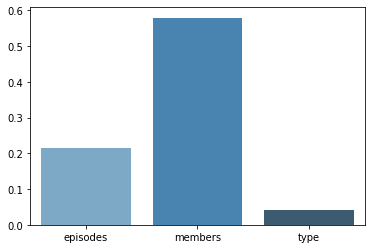

In [19]:
importance = reg.feature_importances_
sns.barplot(train_X.columns[:3], importance[:3], palette="Blues_d")


In [20]:
reg = LinearRegression()
model_result.append(cross_val_score(reg, train_X, train_Y,
                                    scoring=make_scorer(mean_squared_error)))
print("avg RMSE: %.4f" % result.mean())

avg RMSE: 0.7218


In [21]:
expansion = PolynomialFeatures()
poly_train_X = expansion.fit_transform(train_X)
reg = LinearRegression()
model_result.append(cross_val_score(reg, poly_train_X, train_Y,
                                    scoring=make_scorer(mean_squared_error)))



In [22]:
# #!data visulization

C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

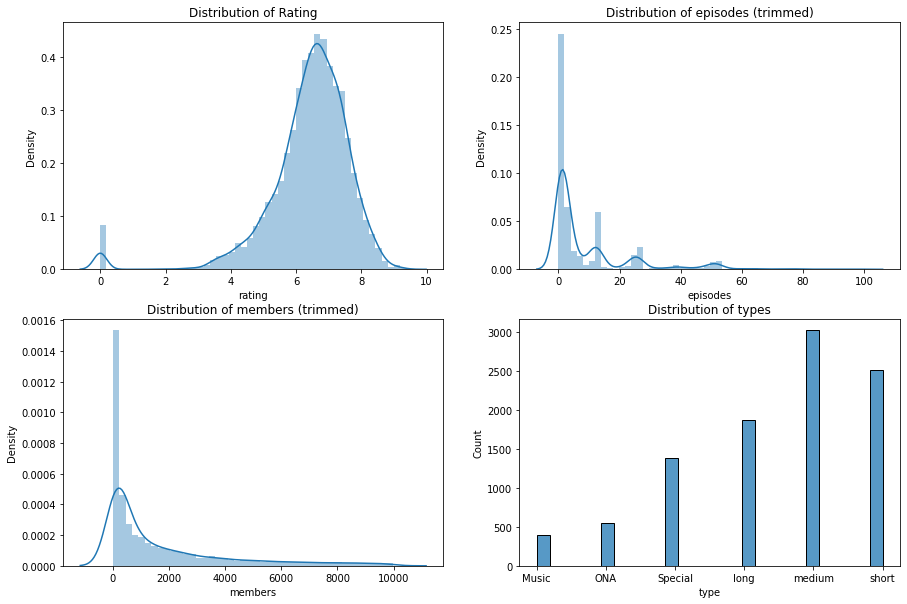

In [23]:
plt.rc("figure", figsize=(15, 10))
fig, axes = plt.subplots(2, 2)
sns.distplot(train["rating"], ax=axes[0][0])
axes[0][0].set_title("Distribution of Rating")
sns.distplot(train[train["episodes"] < 100]["episodes"], ax=axes[0][1])
axes[0][1].set_title("Distribution of episodes (trimmed)")
sns.distplot(train[train["members"] < 1e4]["members"], ax=axes[1][0])
axes[1][0].set_title("Distribution of members (trimmed)")
sns.histplot(train["type"], ax=axes[1][1],)
axes[1][1].set_title("Distribution of types")
axes[1][1].set_xticklabels([""]+all_type)
plt.show()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 46)                184       
_________________________________________________________________
dense (Dense)                (None, 300)               14100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 76,685
Trainable params: 75,593
Non-trainable params: 1,092
________________________________________________

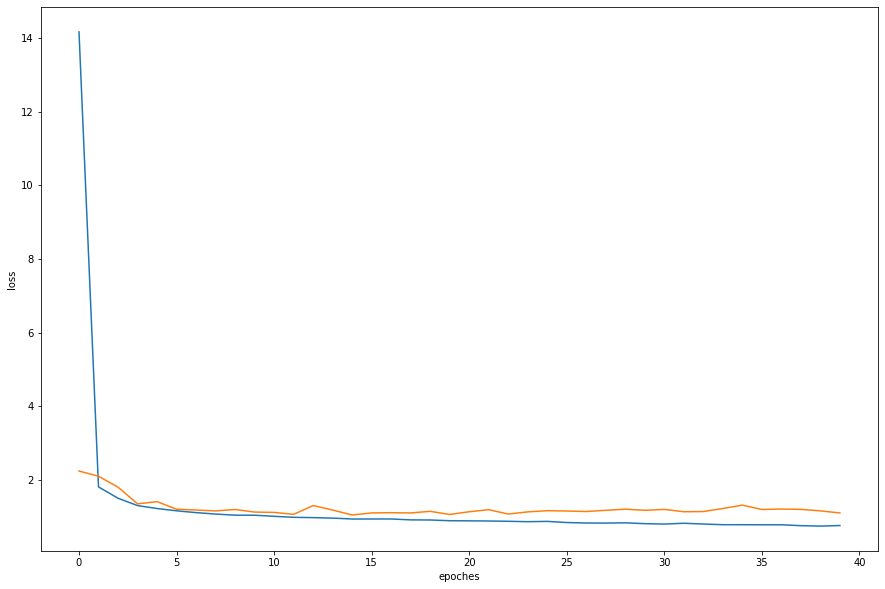

In [24]:
mlp = keras.models.Sequential()
mlp.add(keras.layers.Input([46, ]))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(300, activation="relu"))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(200, activation="relu"))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(1))
mlp.compile(loss=['mse'], metrics=['mse'])
mlp.summary()
history = mlp.fit(train_X, train_Y, epochs=40, validation_data=(val_X, val_Y))
plt.xlabel("epoches")
plt.ylabel("loss")
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
model_result.append(mean_squared_error(train_Y, mlp.predict(train_X)))
# result = cross_val_score(mlp, train_X, train_Y,
#                          scoring=make_scorer(mean_squared_error))

In [25]:
# pair_fig = sns.pairplot(train[["episodes", "rating", "members", "type"]])
# pair_fig.savefig("pair_plot.png")
# plt.rc("figure", figsize=(6, 4))

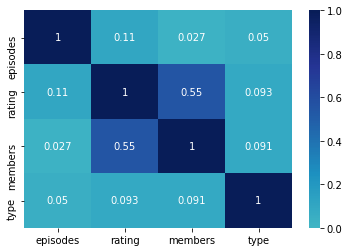

In [26]:
plt.rc("figure", figsize=(6, 4))
corr = sns.heatmap(train[["episodes", "rating", "members", "type"]
                         ].corr(), vmin=0, vmax=1, center=0, cmap="YlGnBu", annot=True)
corr.get_figure().savefig("corr.png")

In [27]:
#! this is buggy, the square shall be applied elementwise..
for i in range(len(model_result)):
    model_result[i] = model_result[i].mean()

model_result = list(map(lambda x: np.sqrt(x), model_result))


C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '5-fold CV RMSE')

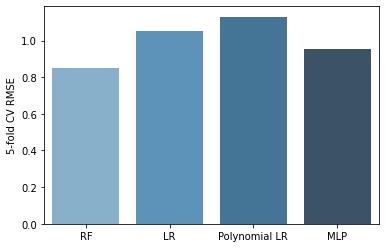

In [28]:
sns.barplot(["RF", "LR", "Polynomial LR", "MLP"],
            model_result, palette="Blues_d")
plt.ylabel("5-fold CV RMSE")

In [29]:
breakpoint()
importance = reg.feature_importances_
sns.barplot(train_X.columns[:3], importance[:3], palette="Blues_d")


AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [30]:
import keras
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder



In [31]:
train = pd.read_csv("Teleplay.csv", delimiter=",")
train.dropna(axis=0, how="any", inplace=True)

In [32]:
train.head()

,teleplay_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",long,1,9.37,200630
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.25,114262
2,9253,Steins;Gate,"Sci-Fi, Thriller",medium,24,9.17,673572
3,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",medium,51,9.16,151266
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",medium,10,9.15,93351


In [33]:
train.info()
train = train.drop(["name"], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9972 entries, 0 to 10203
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   teleplay_id  9972 non-null   int64  
 1   name         9972 non-null   object 
 2   genre        9972 non-null   object 
 3   type         9972 non-null   object 
 4   episodes     9972 non-null   object 
 5   rating       9972 non-null   float64
 6   members      9972 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 623.2+ KB


In [34]:


def tokenize(input_str: str = None) -> list:
    try:
        assert isinstance(input_str, str)
    except AssertionError as e:
        return list()

    return [word.strip() for word in input_str.split(",")]


def get_all_genre() -> list:
    genre = train["genre"]
    all_genre = set()
    for line in genre:
        for item in tokenize(line):
            all_genre.add(item)
    # Python set does not guarantee order, so convert to list
    return list(all_genre)


all_genre = get_all_genre()
all_type = np.unique(train["type"]).tolist()


In [35]:


def encode_genre(arr: list, all_genre: list) -> list:
    """
        encode genre to a vector, like "multi-hot encoder"
    """
    encoded = np.zeros_like(all_genre, dtype=np.int64)
    for genre in arr:
        encoded[all_genre.index(genre)] = 1
    return encoded


def encode_type(arr: list, all_type: list) -> list:
    encoded = [all_type.index(t) for t in arr]
    return encoded



In [36]:
encoded_genre = pd.DataFrame(
    np.array([encode_genre(tokenize(genre), all_genre) for genre in train["genre"]], dtype=np.int64), columns=all_genre, dtype=np.int64)
encoded_type = pd.DataFrame(
    np.array(encode_type(train["type"], all_type), dtype=np.int64), columns=["type"])

train = train.drop(["genre", "type"], axis=1)
train[train["episodes"] == "Unknown"] = 0.0
pd.to_numeric(train["episodes"])
train = train.astype("float")

train = pd.concat([train, encoded_type], axis=1)
train = pd.concat([train, encoded_genre], axis=1)
train.dropna(axis=0, how="any", inplace=True)

# capping
train.loc[train["episodes"] > 1000, "episodes"] = 1000
train.loc[train["members"] > 10000, "members"] = 10000


#!! baselines

In [37]:
model_result = []

train = train.astype("float")
train_Y = train["rating"]
train_X = train.drop(["rating", "teleplay_id"], axis=1)

In [38]:
reg = RandomForestRegressor()
train_X, val_X, train_Y, val_Y = train_test_split(
    train_X, train_Y, test_size=0.2)
reg.fit(train_X, train_Y)
mean_squared_error(val_Y, reg.predict(val_X))
result = np.sqrt(cross_val_score(reg, train_X, train_Y,
                                 scoring=make_scorer(mean_squared_error)))
print("avg RMSE: %.4f" % result.mean())
model_result.append(result)

avg RMSE: 0.7181


C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

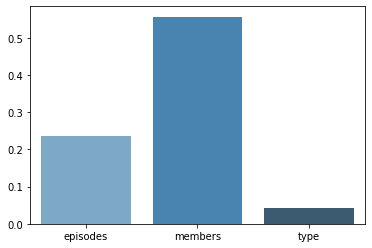

In [39]:
importance = reg.feature_importances_
sns.barplot(train_X.columns[:3], importance[:3], palette="Blues_d")


In [40]:
reg = LinearRegression()
result = np.sqrt(cross_val_score(reg, train_X, train_Y,
                                 scoring=make_scorer(mean_squared_error)))
print("avg RMSE: %.4f" % result.mean())
model_result.append(result)

avg RMSE: 1.0596


In [41]:
expansion = PolynomialFeatures()
poly_train_X = expansion.fit_transform(train_X)
reg = LinearRegression()
result = np.sqrt(cross_val_score(reg, train_X, train_Y,
                                 scoring=make_scorer(mean_squared_error)))
print("avg RMSE: %.4f" % result.mean())
model_result.append(result)



avg RMSE: 1.0596


In [42]:
# #!data visualization

C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

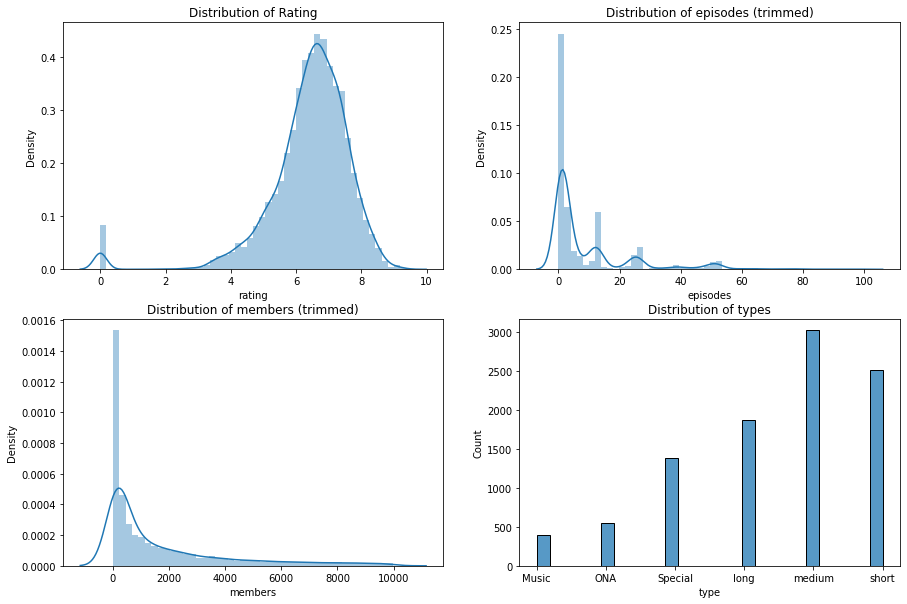

In [43]:
plt.rc("figure", figsize=(15, 10))
fig, axes = plt.subplots(2, 2)
sns.distplot(train["rating"], ax=axes[0][0])
axes[0][0].set_title("Distribution of Rating")
sns.distplot(train[train["episodes"] < 100]["episodes"], ax=axes[0][1])
axes[0][1].set_title("Distribution of episodes (trimmed)")
sns.distplot(train[train["members"] < 1e4]["members"], ax=axes[1][0])
axes[1][0].set_title("Distribution of members (trimmed)")
sns.histplot(train["type"], ax=axes[1][1],)
axes[1][1].set_title("Distribution of types")
axes[1][1].set_xticklabels([""]+all_type)
plt.show()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 46)                184       
_________________________________________________________________
dense_3 (Dense)              (None, 300)               14100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 76,685
Trainable params: 75,593
Non-trainable params: 1,092
______________________________________________

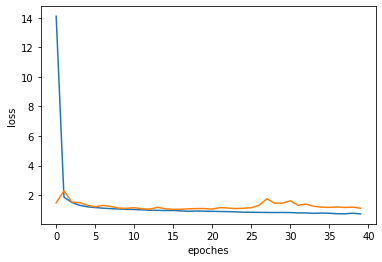

In [44]:
mlp = keras.models.Sequential()
mlp.add(keras.layers.Input([46, ]))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(300, activation="relu"))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(200, activation="relu"))
mlp.add(keras.layers.BatchNormalization())
mlp.add(keras.layers.Dense(1))
mlp.compile(loss=['mse'], metrics=['mse'])
mlp.summary()
history = mlp.fit(train_X, train_Y, epochs=40, validation_data=(val_X, val_Y))
plt.rc("figure", figsize=(6, 4))
plt.xlabel("epoches")
plt.ylabel("loss")
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
model_result.append(mean_squared_error(train_Y, mlp.predict(train_X)))
# result = cross_val_score(mlp, train_X, train_Y,
#                          scoring=make_scorer(mean_squared_error))

In [45]:
# pair_fig = sns.pairplot(train[["episodes", "rating", "members", "type"]])
# pair_fig.savefig("pair_plot.png")
# plt.rc("figure", figsize=(6, 4))

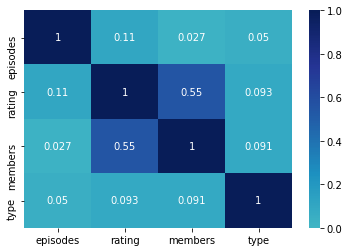

In [46]:
plt.rc("figure", figsize=(6, 4))
corr = sns.heatmap(train[["episodes", "rating", "members", "type"]
                         ].corr(), vmin=0, vmax=1, center=0, cmap="YlGnBu", annot=True)
corr.get_figure().savefig("corr.png")

In [47]:
#! this is buggy, the square shall be applied elementwise..
for i in range(len(model_result)):
    model_result[i] = model_result[i].mean()

model_result = list(map(lambda x: np.sqrt(x), model_result))


C:\Users\11385\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '5-fold CV RMSE')

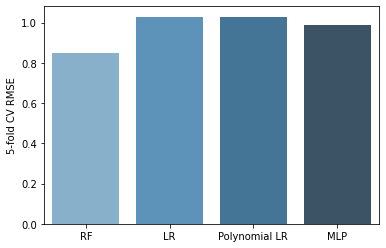

In [48]:
sns.barplot(["RF", "LR", "Polynomial LR", "MLP"],
            model_result, palette="Blues_d")
plt.ylabel("5-fold CV RMSE")